In [4]:
import os

%matplotlib notebook
import matplotlib.pyplot as plt

from IPython.display import Image

### Planogram

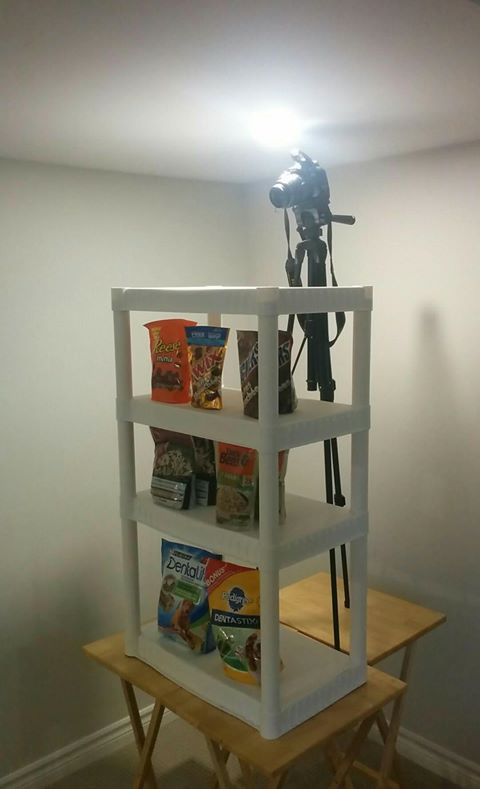

In [2]:
Image(filename='planogram.jpg')

The products are:

```
---------------------------
| REESE | TWIX | SNICKERS |
---------------------------
| SENSATIONS | UNCLE BENS |
---------------------------
| DENTALITE  | DENTASTIX  |
---------------------------
```

### Original Video

In [5]:
cd data

/home/elijahtai/Documents/github.com/vendlytics/notebooks/visualization/data


In [6]:
ls

output-_local_1.txt  video-det-fold-_local.txt  videos/


In [7]:
cd videos

/home/elijahtai/Documents/github.com/vendlytics/notebooks/visualization/data/videos


In [8]:
ls

Camera 1 - Vendlytics Prototype.mp4  output-_local_1.avi  output-_local.avi


In [9]:
cd ../..

/home/elijahtai/Documents/github.com/vendlytics/notebooks/visualization


In [10]:
DATA_DIR = 'data'
VIDEOS_DIR = 'videos'

ORIGINAL_VIDEO_FILENAME = 'Camera 1 - Vendlytics Prototype.mp4'
FACE_DETECTION_VIDEO_FILENAME = 'output-_local.avi'
GAZE_DETECTION_VIDEO_FILENAME = 'output-_local_1.avi'

FACE_BBOXES_FILENAME = 'video-det-fold-_local.txt'
GAZE_ANGLES_FILENAME = 'output-_local_1.txt'

ORIGINAL_VIDEO_PATH = os.path.join(DATA_DIR, VIDEOS_DIR, ORIGINAL_VIDEO_FILENAME)
FACE_DETECTION_VIDEO_PATH = os.path.join(DATA_DIR, VIDEOS_DIR, FACE_DETECTION_VIDEO_FILENAME)
GAZE_DETECTION_VIDEO_PATH = os.path.join(DATA_DIR, VIDEOS_DIR, GAZE_DETECTION_VIDEO_FILENAME)
FACE_BBOXES_PATH = os.path.join(DATA_DIR, FACE_BBOXES_FILENAME)
GAZE_ANGLES_PATH = os.path.join(DATA_DIR, GAZE_ANGLES_FILENAME)

In [32]:
from moviepy.editor import *

In [1]:
# original_video = VideoFileClip(ORIGINAL_VIDEO_PATH).subclip(t_start=27, t_end=86)
# original_video.ipython_display(width=600)

In [2]:
# face_video = VideoFileClip(FACE_DETECTION_VIDEO_PATH).subclip(t_start=27, t_end=87)
# face_video.ipython_display(width=500)

In [3]:
# gaze_video = VideoFileClip(GAZE_DETECTION_VIDEO_PATH).subclip(t_start=27, t_end=87)
# gaze_video.ipython_display(width=500)

### Visualize Gaze

In [11]:
import pandas as pd
import numpy as np

In [12]:
bbox_df = pd.read_csv(FACE_BBOXES_PATH, delimiter=' ', header=None)
bbox_df.columns = ['frame_number', 'x_min', 'y_min', 'x_max', 'y_max', 'confidence_score']

In [13]:
bbox_df.head()

frame_number      x_min     y_min       x_max      y_max  confidence_score
0           668   0.000000  2.769838   36.433937  53.557083          0.960417
1           671   3.186478  2.641691   66.019836  53.837234          0.879167
2           681  74.091316  0.000000  129.792801  66.953537          0.944494
3           682  71.471588  0.000000  143.034180  67.177017          0.987946
4           683  67.986679  0.000000  136.474899  64.204681          0.987006

In [14]:
gaze_df = pd.read_csv(GAZE_ANGLES_PATH, delimiter=' ', header=None)
gaze_df.columns = ['frame_number', 'x_angle', 'y_angle', 'z_angle']

In [15]:
gaze_df.head()

frame_number    x_angle   y_angle   z_angle
0           682  -9.101837 -4.555634 -0.912392
1           683 -13.126450 -1.246826 -1.620468
2           684 -15.179825  2.938110  1.712021
3           685 -17.545975  4.570633 -1.424942
4           686 -15.356705 -1.959663  3.927353

<IPython.core.display.Javascript object>


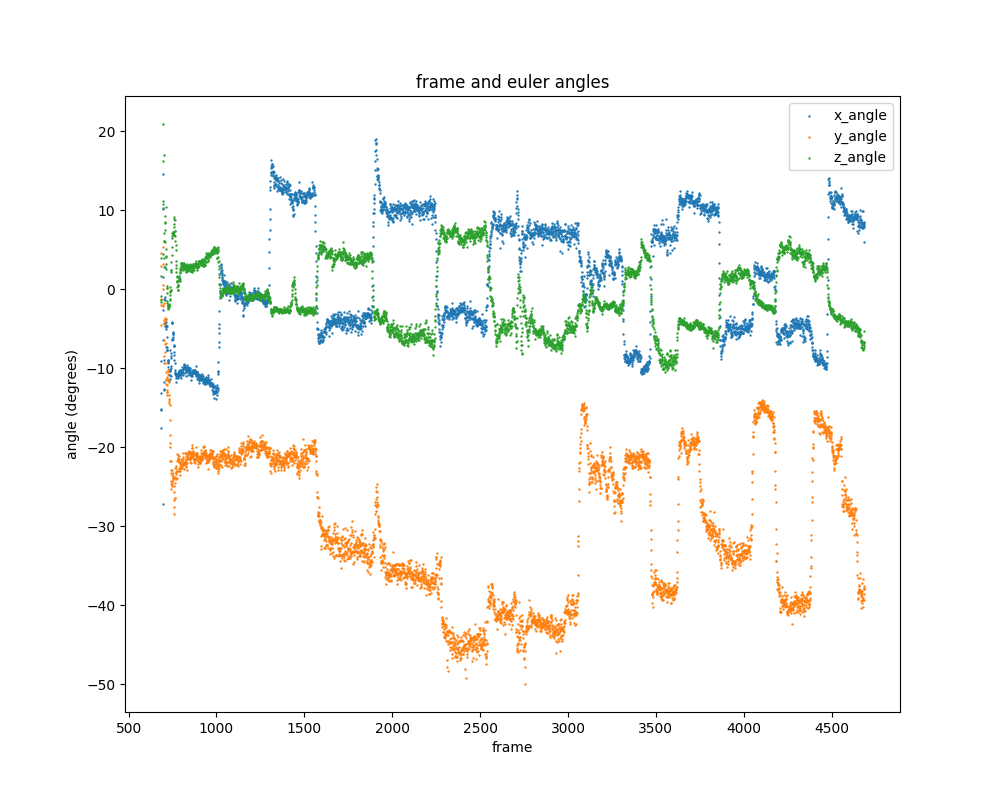

In [16]:
MARKER_SIZE = 0.5
FRAME_LIMIT = 4000

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)

x = gaze_df.T.loc['frame_number'][:FRAME_LIMIT]
ax1.scatter(x, gaze_df.T.loc['x_angle'][:FRAME_LIMIT], s=MARKER_SIZE) # x angle
ax1.scatter(x, gaze_df.T.loc['y_angle'][:FRAME_LIMIT], s=MARKER_SIZE) # y angle
ax1.scatter(x, gaze_df.T.loc['z_angle'][:FRAME_LIMIT], s=MARKER_SIZE) # z angle

plt.title("frame and euler angles")
plt.xlabel("frame")
plt.ylabel("angle (degrees)")

plt.legend(["x_angle", "y_angle", "z_angle"])
fig.show()

Correlate the angles with the products.

Need to project out angles to new space and use that as target.

In [117]:
# times (s) when ashton was looking at each of 7 products
# TIME_MARKERS_SEC = [27, 34, 44, 53, 66, 77, 87]
TIME_MARKERS_SEC = [27, 37, 47, 57, 65, 77, 87]
# TIME_MARKERS_SEC = np.arange(27, 97, 10).tolist() # Averaged markers

# we know video is 30 fps, so 30 * TIME_MARKERS_SEC[i]
# (where i is single product) gives us frame to use angle from
TIME_MARKERS_FRAMES = [(30 * i) for i in TIME_MARKERS_SEC]

In [118]:
TIME_MARKERS_SEC

[27, 37, 47, 57, 65, 77, 87]

In [119]:
TIME_MARKERS_FRAMES

[810, 1110, 1410, 1710, 1950, 2310, 2610]

In [120]:
# since gaze_video starts at 27
TIME_MARKERS_FOR_VIDEO = [i - 27 for i in TIME_MARKERS_SEC]
TIME_MARKERS_FOR_VIDEO_FRAMES = [30 * i for i in TIME_MARKERS_FOR_VIDEO]

In [121]:
TIME_MARKERS_FOR_VIDEO

[0, 10, 20, 30, 38, 50, 60]

In [99]:
def frame_to_seconds(frame):
    return frame / 30


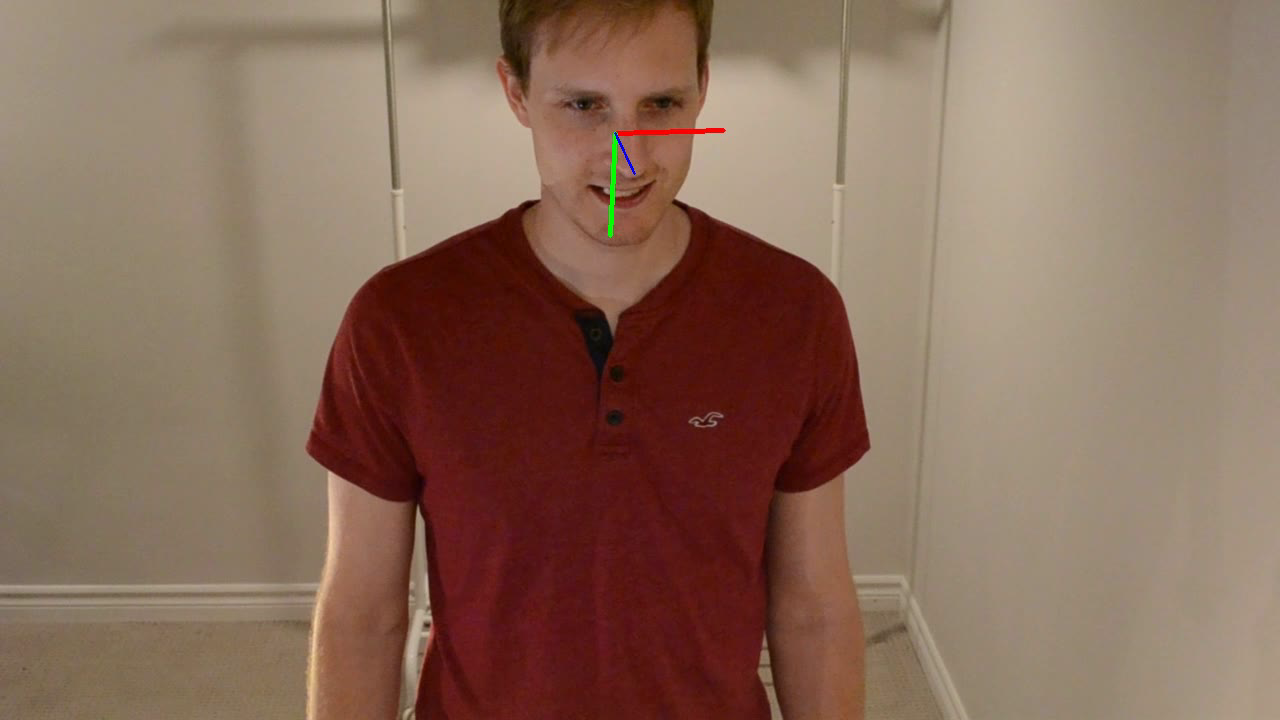

In [67]:
gaze_video.ipython_display(t=TIME_MARKERS_FOR_VIDEO[0], width=500)


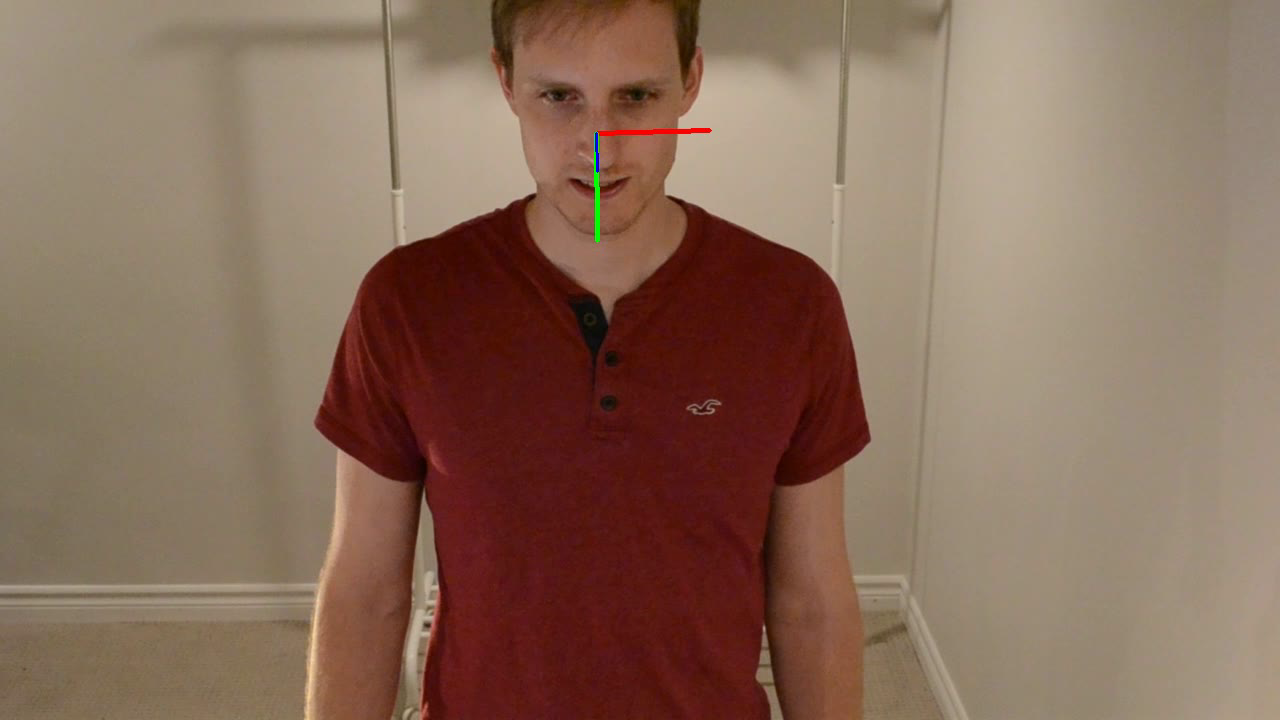

In [42]:
gaze_video.ipython_display(t=TIME_MARKERS_FOR_VIDEO[1], width=500)


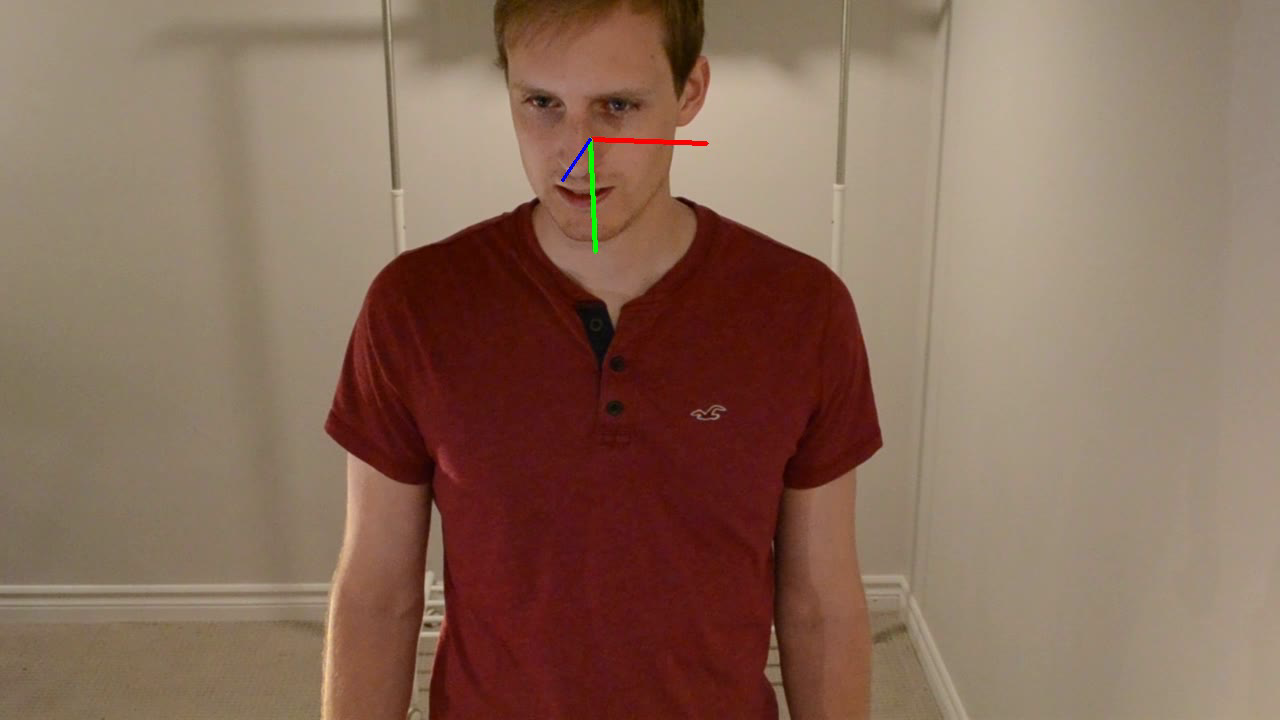

In [229]:
gaze_video.ipython_display(t=TIME_MARKERS_FOR_VIDEO[2], width=500)


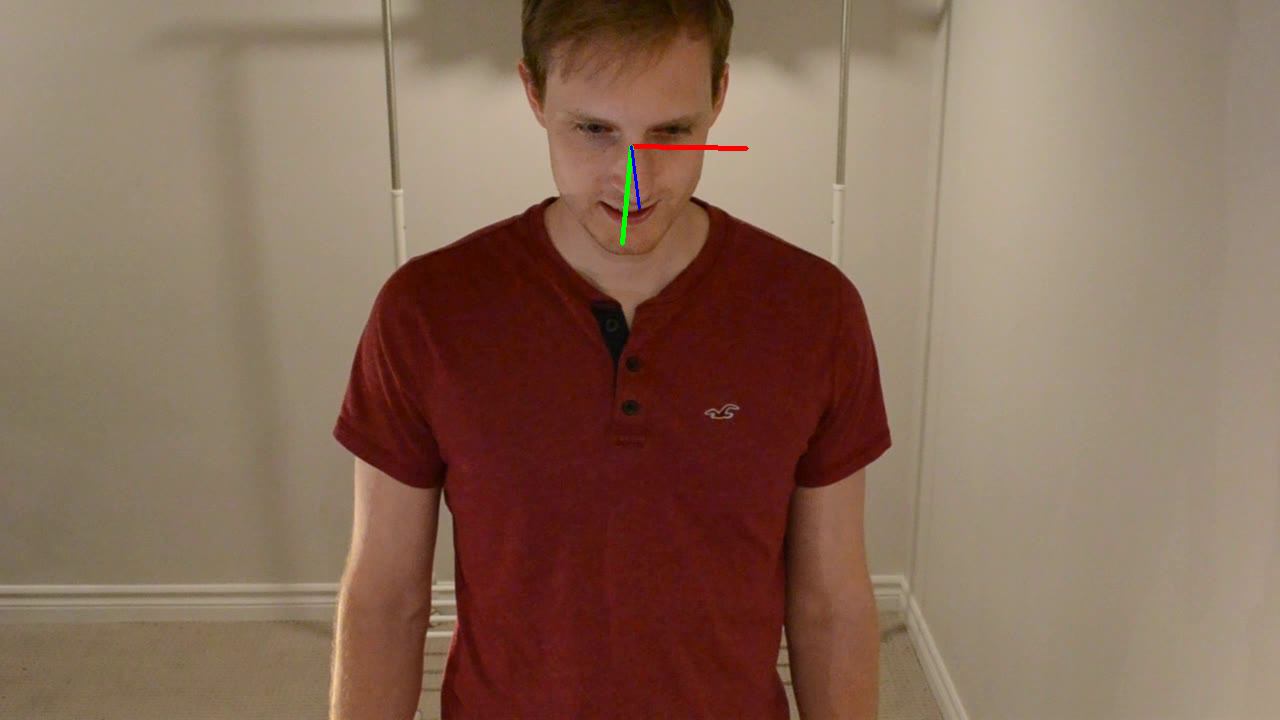

In [230]:
gaze_video.ipython_display(t=TIME_MARKERS_FOR_VIDEO[3], width=500)


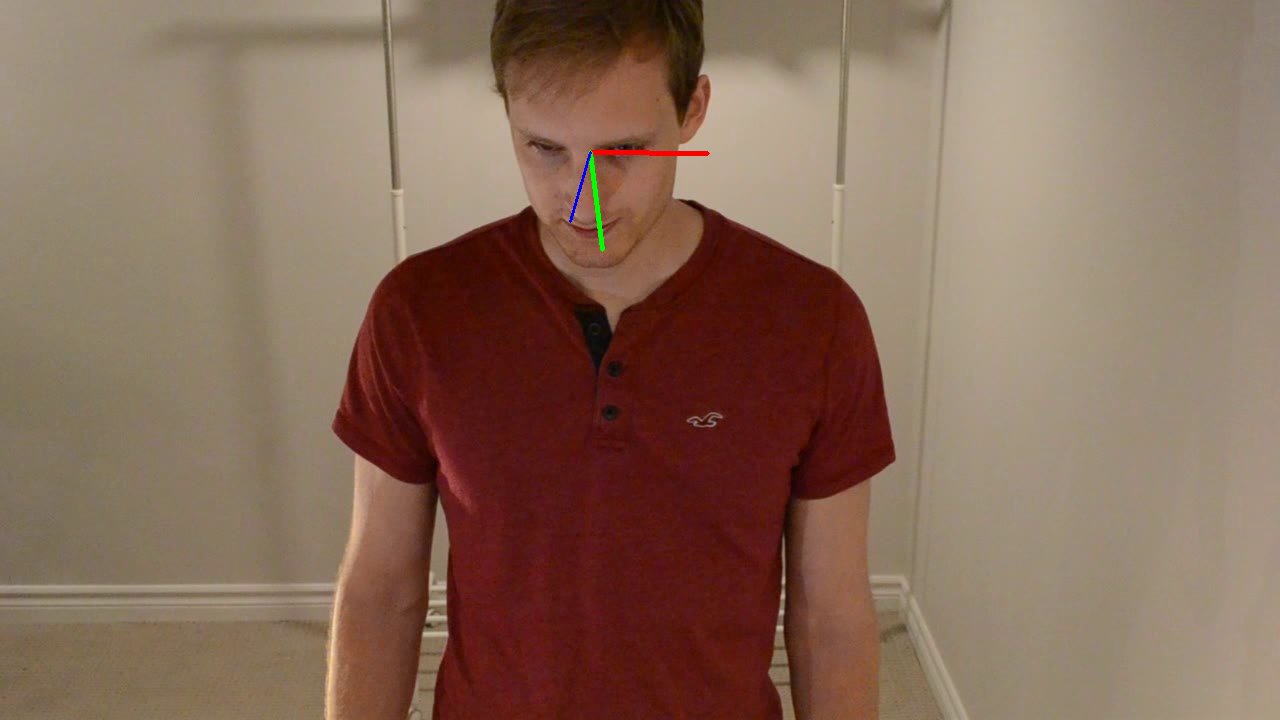

In [231]:
gaze_video.ipython_display(t=TIME_MARKERS_FOR_VIDEO[4], width=500)


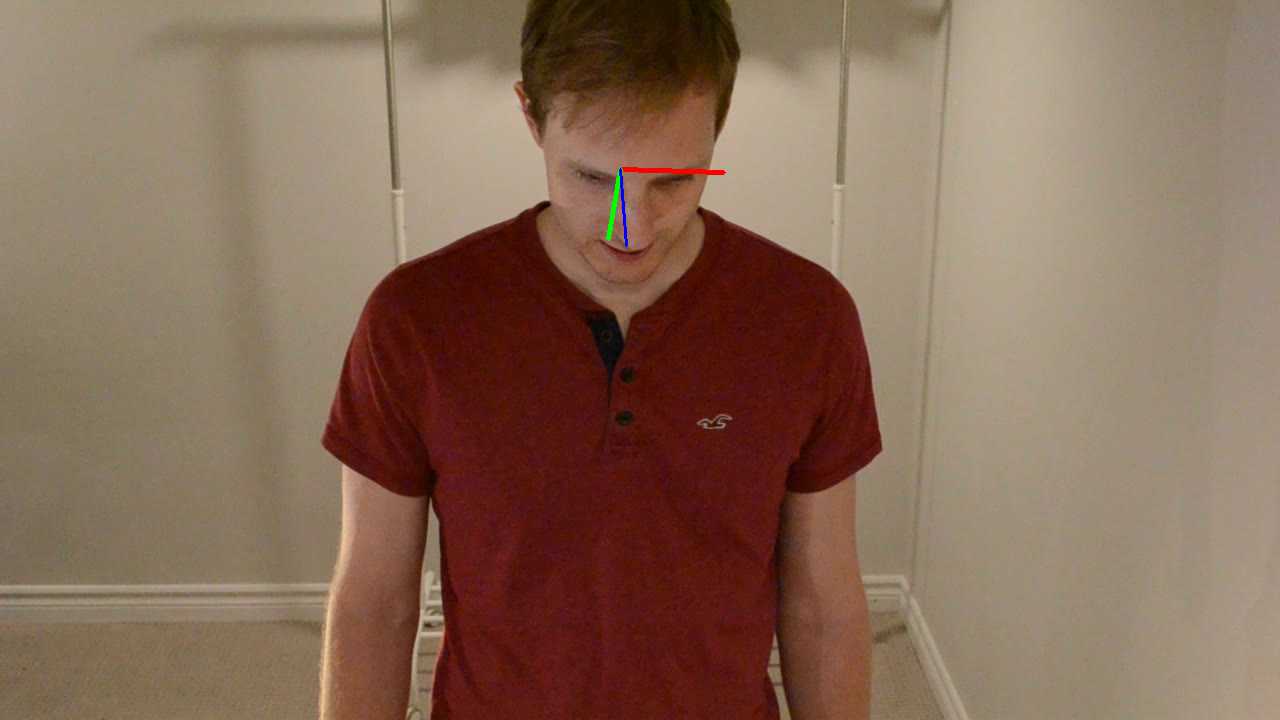

In [232]:
gaze_video.ipython_display(t=TIME_MARKERS_FOR_VIDEO[5], width=500)


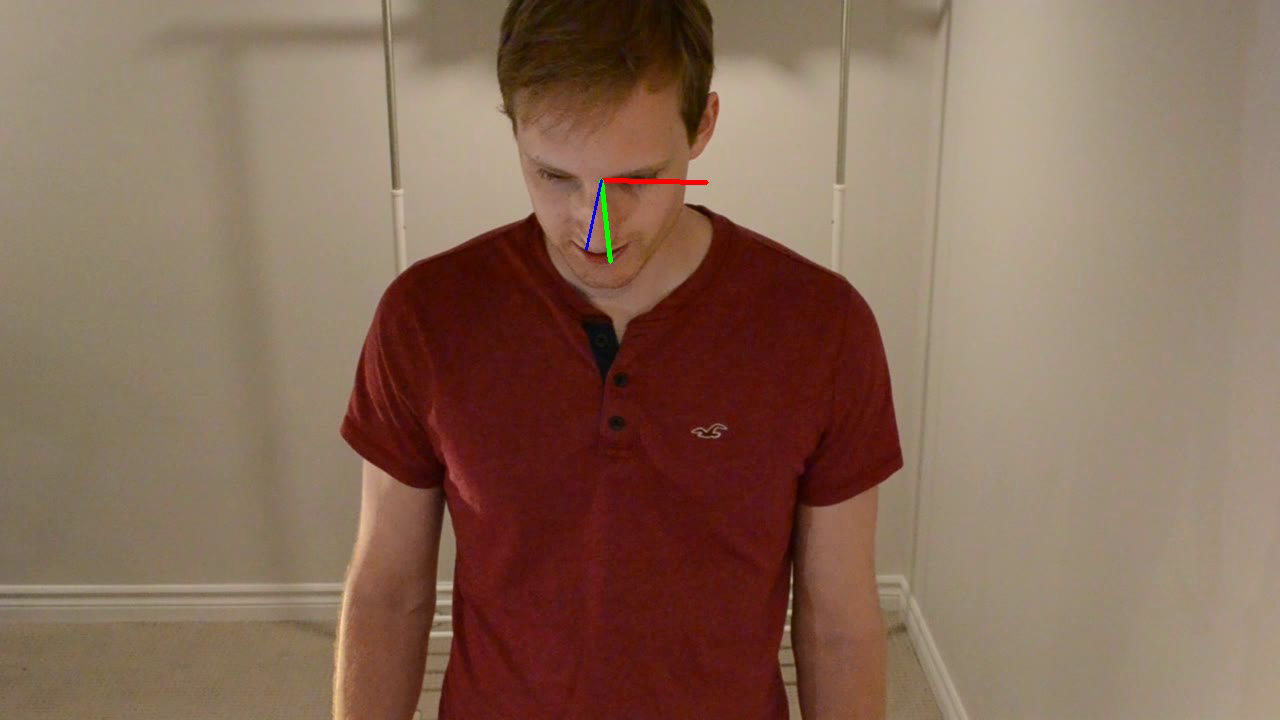

In [233]:
gaze_video.ipython_display(t=TIME_MARKERS_FOR_VIDEO[6], width=500)

For each of the times, let's get the:
- position of face bounding box (centroid of rectangle)
- size of face bounding box
- gaze x_angle
- gaze y_angle
- gaze z_angle

In [128]:
def calculate_rectangle_centroid(min_x, min_y, max_x, max_y):
    """
    Returns a tuple (x, y) which gives the position of the face bounding box.
    """
    return (min_x + max_x) / 2, (min_y + max_y) / 2  


def calculate_rectangle_area(min_x, min_y, max_x, max_y):
    """
    Returns the pixel area of the face bounding box.
    """
    return (max_x - min_x) * (max_y - min_y)

rect_centroids = []
rect_areas = []
gaze_x_angles = []
gaze_y_angles = []
gaze_z_angles = []

MAX_PADDING = 30

for frame in TIME_MARKERS_FRAMES:
    error = True
    print("frame", frame)
    
    # bbox
    # TODO: Take the average over the variance-bound frame interval
    bbox_coords = bbox_df.loc[bbox_df["frame_number"] == frame][['x_min', 'y_min', 'x_max', 'y_max']].as_matrix()[0]
    rect_centroid = calculate_rectangle_centroid(bbox_coords[0], bbox_coords[1], bbox_coords[2], bbox_coords[3])
    rect_area = calculate_rectangle_area(bbox_coords[0], bbox_coords[1], bbox_coords[2], bbox_coords[3])
    
    # gaze
    def get_average(angle, max_padding):
        padding = 1
        
        before = frame - padding <= gaze_df["frame_number"]
        after = gaze_df["frame_number"] <= frame + padding
        a = gaze_df.loc[after & before][angle].values
        
        # Variance-bound dynamic padding increments
        while a.var() <= 2.5 and padding < MAX_PADDING: # max variance setting
            padding += 1
            before = frame - padding <= gaze_df["frame_number"]
            after = gaze_df["frame_number"] <= frame + padding
            a = gaze_df.loc[after & before][angle].values
#             print(a.mean(), a.var())
        
        print("final padding:", padding)
        return a.mean()
    
    gaze_x_angle = get_average('x_angle', MAX_PADDING)
    gaze_y_angle = get_average('y_angle', MAX_PADDING)
    gaze_z_angle = get_average('z_angle', MAX_PADDING)
    #gaze_x_angle = gaze_df.loc[gaze_df["frame_number"] == frame]['x_angle'].values[0]
    #gaze_y_angle = gaze_df.loc[gaze_df["frame_number"] == frame]['y_angle'].values[0]
    #gaze_z_angle = gaze_df.loc[gaze_df["frame_number"] == frame]['z_angle'].values[0]
    
    rect_centroids.append(rect_centroid)
    rect_areas.append(rect_area)
    gaze_x_angles.append(gaze_x_angle)
    gaze_y_angles.append(gaze_y_angle)
    gaze_z_angles.append(gaze_z_angle)
    
    print("rect_centroid", rect_centroid)
    print("rect_area", rect_area)
    print("gaze_angles", gaze_x_angle, gaze_y_angle, gaze_z_angle)
    print()

frame 810
final padding: 30
final padding: 30
final padding: 30
rect_centroid (616.0491945, 126.5688365)
rect_area 36319.58733578324
gaze_angles -10.33387814754098 -21.87918042622951 2.4169493114754093

frame 1110
final padding: 30
final padding: 30
final padding: 30
rect_centroid (605.5236205, 133.57349)
rect_area 37912.131621328976
gaze_angles -0.5196460655737706 -21.448409786885247 0.012197803278688532

frame 1410
final padding: 30
final padding: 30
final padding: 30
rect_centroid (590.0603025, 129.24693249999999)
rect_area 41351.341552970676
gaze_angles 12.074109540983605 -21.27744955737705 -1.9140470819672133

frame 1710
final padding: 30
final padding: 30
final padding: 30
rect_centroid (626.554077, 147.0715635)
rect_area 40233.07019365399
gaze_angles -4.0766065573770485 -32.62209737704918 4.333533754098362

frame 1950
final padding: 30
final padding: 21
final padding: 30
rect_centroid (589.3866425, 150.753296)
rect_area 35876.43329077734
gaze_angles 10.705032229508197 -34.154814

`rect_area` is important because it gives us a sense of the distance of the face from the camera.

Resolution of video is: `1280 (x) by 786 (y)`.

### Time to project to plane.

Assume:
- that the shelves are directly underneath the camera

Need to build a "virtual shelf" that's not actually in the view of the camera.

The plane created by the `x` (red in video), `y` (green in video) Euler angles gives the plane of the shelves. The distance of the person from the shelf can be calibrated by a rough estimate first, and then we can use `size2depth` or something that estimates depth from 2d images (later).

In [129]:
# creating the shelf plane

# can define shelf plane with just the point (rect_centroid) 
# and normal vector (to be calculated)

# then the distance of the shelves from the person with some estimate
# to move that plane in the direction of the norm vector
print(gaze_x_angles[0], gaze_y_angles[0], gaze_z_angles[0])
yaw_angle = gaze_x_angles[0]
pitch_angle = gaze_y_angles[0]

approx_distance_from_shelf = 100

-10.33387814754098 -21.87918042622951 2.4169493114754093


In [130]:
def convert_from_euler_angle_to_vector(yaw_angle, pitch_angle):
    """
    Converts from angles to directional vector.
    """
    yaw_angle_radians = yaw_angle * np.pi / 180
    pitch_angle_radians = pitch_angle * np.pi / 180
    
    return np.array([
        np.cos(yaw_angle_radians) * np.cos(pitch_angle_radians),
        np.sin(yaw_angle_radians) * np.cos(pitch_angle_radians),
        np.sin(pitch_angle_radians)
    ])

In [131]:
# what does the vector look like?
def plot_directional_vectors(z_vectors):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(5, 5))
    
    ax = fig.gca(projection='3d')
    ax.set_xlim3d(-1, 2)
    ax.set_ylim3d(-1, 2)
    ax.set_zlim3d(-1, 2)
    ax.hold(True)
    
    for z_vector in z_vectors:
        print(z_vector)
        ax.quiver(0, 0, 0, *z_vector, length = 5)

    plt.show()

In [132]:
z_vectors = []
for yaw, pitch in zip(gaze_x_angles, gaze_y_angles):
    z_vector = convert_from_euler_angle_to_vector(yaw, pitch)    
    z_vectors.append(z_vector)

<IPython.core.display.Javascript object>


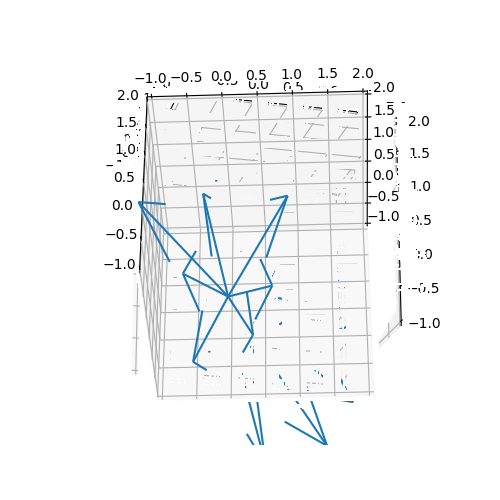

[ 0.91291923 -0.16646322 -0.37265061]
[ 0.93070892 -0.00844133 -0.36566331]
[ 0.91121996  0.19491799 -0.36288451]
[ 0.84011358 -0.05987533 -0.53909566]
[ 0.81312177  0.15371492 -0.56143094]
[ 0.7067352  -0.0407319  -0.70630466]
[ 0.74558511  0.1049639  -0.65809226]


In [133]:
plot_directional_vectors(z_vectors)

The idea here is to use the very first (calibrating) vector which will help us create the plane of the shelf on which the products lie.

We will push this plane out from the origin in the direction of the calibrating vector by some quantity, and then find the points on the plane on which all of the other vectors intersect that (shelf) plane.

In [134]:
z_vectors[0]

array([ 0.91291923, -0.16646322, -0.37265061])

In [144]:
DIST_ESTIMATE = 100000 # some random approximation of the distance

In [193]:
shelf_plane_norm = z_vectors[0]

`z_vectors[0]` is the normal vector. The point above is the point where the shelf plane lies.

Equation of plane will always be:
$ax + by + cz + d_{estimate} = 0$, where $a$, $b$, and $c$ are the three parts of the normal vector.

Now find the point of intersection on the shelf plane with all of the other vectors extended out.

$A(at) + B(bt) + C(ct) + D = 0$

In [264]:
def calculate_poi_new(n_vector, i_vector, dist_estimate):
    """
    Finds the point of intersection of a vector on the shelf plane.
    
    n_vector is shelf plane vector i.e. normal to the shelf plane
    i_vector is intersecting vector
    dist_estimate is estimate of shelf distance from person
    
    Notation from http://www.ambrsoft.com/TrigoCalc/Plan3D/PlaneLineIntersection_.htm
    """
    p_vector = n_vector + dist_estimate
    t = -(np.dot(n_vector, p_vector) + dist_estimate) / float(np.dot(n_vector, i_vector))  
    return i_vector * t
#    t = -dist_estimate / np.dot(p_vector, i_vector)
#     x_poi = 0 - (i_vector[0] * t)
#     y_poi = 0 - (i_vector[1] * t)
#     z_poi = 0 - (i_vector[2] * t)
#     return np.array([x_poi, y_poi, z_poi])

In [265]:
coordinates = []

for i in range(0, 7):
    coordinates.append(calculate_poi_new(shelf_plane_norm, z_vectors[i], DIST_ESTIMATE))

In [266]:
coordinates

[array([-125418.24892487,   22868.97406525,   51195.31444843]),
 array([-129502.7786747 ,    1174.56216179,   50879.94133475]),
 array([-133937.24072217,  -28650.35824206,   53339.20675097]),
 array([-118034.4302137 ,    8412.37437116,   75741.95958868]),
 array([-120642.17307929,  -22806.5496166 ,   83299.0226391 ]),
 array([-106091.31302829,    6114.45477722,  106026.68240759]),
 array([-112755.20637691,  -15873.74203401,   99523.61985633])]

In [326]:
from mpl_toolkits.mplot3d import Axes3D

def plot_poi(p_norm, coordinates):
    """
    Plots the points of intersection onto the shelf plane given
    the equation of the plane (ax + by + cz + d = 0) and the
    coordinates on the plane where the gaze intersected.
    
    p_norm     - plane norm aka n_vector aka shelf_plane_norm
    dist_est   - distance estimate of shelf from person
    coordinate - list of POI
    """
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca(projection='3d')
    ax.hold(True)
    
    lim_begin, lim_end = -140000, 140000
    
    # create x,y
    #xx, yy = np.meshgrid(range(-1000, 1000), range(-1000, 1000))
    interval = range(lim_begin, lim_end, 10000)
    xx, yy = np.meshgrid(interval, interval)
    
    # calculate corresponding z
    z = -1 * (p_norm[0] * xx + p_norm[1] * yy + DIST_ESTIMATE) / float(p_norm[2])
    #z = -1 * (p_norm[0] * xx + p_norm[1] * yy) / float(p_norm[2])
    
    z += DIST_ESTIMATE
    
    ax.plot_surface(xx, yy, z, alpha=0.5)
    ax.set_xlim(lim_begin, lim_end)
    ax.set_xlabel("x")
    
    ax.set_ylim(lim_begin, lim_end)
    ax.set_ylabel("y")
    
    ax.set_zlim(lim_begin, lim_end)
    ax.set_zlabel("z")
    
    for coord in coordinates:
        ax.scatter(coord[0], coord[1], coord[2])
  
    plt.show()

In [327]:
coordinates, DIST_ESTIMATE, min([c.min() for c in coordinates]),  max([c.max() for c in coordinates])

([array([-125418.24892487,   22868.97406525,   51195.31444843]),
  array([-129502.7786747 ,    1174.56216179,   50879.94133475]),
  array([-133937.24072217,  -28650.35824206,   53339.20675097]),
  array([-118034.4302137 ,    8412.37437116,   75741.95958868]),
  array([-120642.17307929,  -22806.5496166 ,   83299.0226391 ]),
  array([-106091.31302829,    6114.45477722,  106026.68240759]),
  array([-112755.20637691,  -15873.74203401,   99523.61985633])],
 100000,
 -133937.24072217423,
 106026.68240758502)

<IPython.core.display.Javascript object>


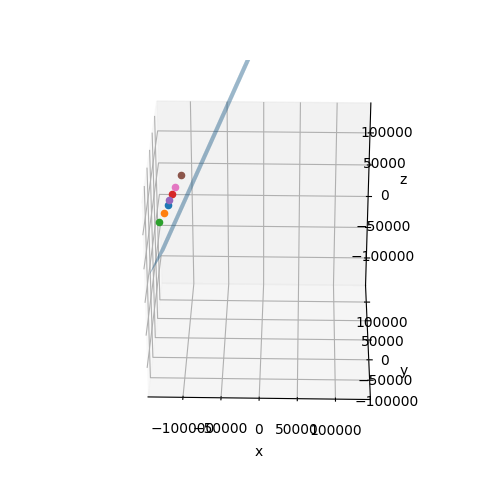

In [328]:
plot_poi(shelf_plane_norm, coordinates)

# TODO:

- get points to go on plane
- experiment with different distances (and then visualize, like 100,000, etc.)
- look into calibration/normalization
- bounding box area/tightness for faces not stable across frames (could look into dlib, for bounding box) - could use average across the frames?

- improve gaze vector picking (look at average?)

### Average everything